### IEMS 490 Project Exploratory Data Analysis
The purpose of this file is to show how hdf5 files functions

In [1]:
import h5py
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
file1 = h5py.File('DATASET/layer1.hdf5', 'r')
file1

<HDF5 file "layer1.hdf5" (mode r)>

In [3]:
file1.keys()

<KeysViewHDF5 ['OpenData']>

In [4]:
file1['OpenData']

<HDF5 dataset "OpenData": shape (11, 31099), type "<f4">

In [5]:
dset = file1['OpenData']
dset[0]

array([-18.487875, -18.487875, -18.487125, ..., -27.77081 , -27.772305,
       -27.77193 ], shape=(31099,), dtype=float32)

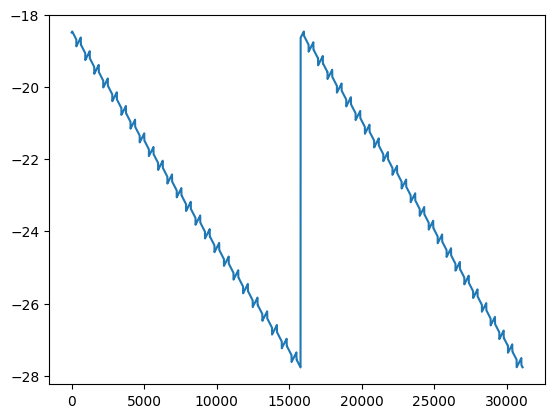

In [28]:
plt.plot(dset[0])
plt.show()

### Y

In [6]:
dset[1]

array([-80.18451 , -80.191986, -80.20322 , ..., -88.27283 , -88.266464,
       -88.262726], shape=(31099,), dtype=float32)

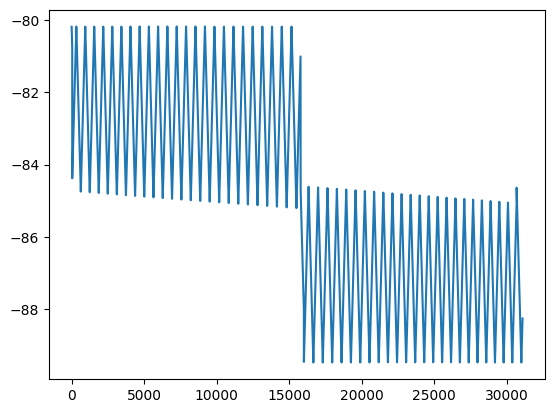

In [27]:
plt.plot(dset[1])
plt.show()

### Power

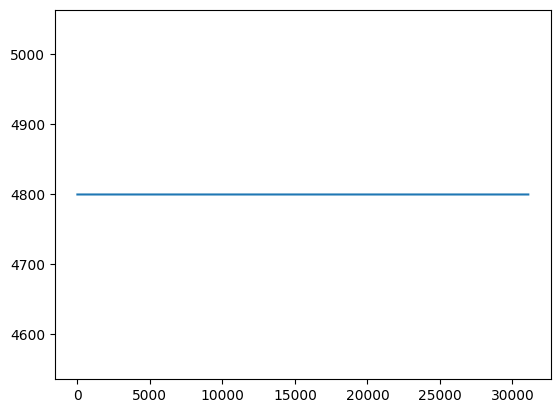

In [18]:
plt.plot(dset[2])
plt.show()

### Speed

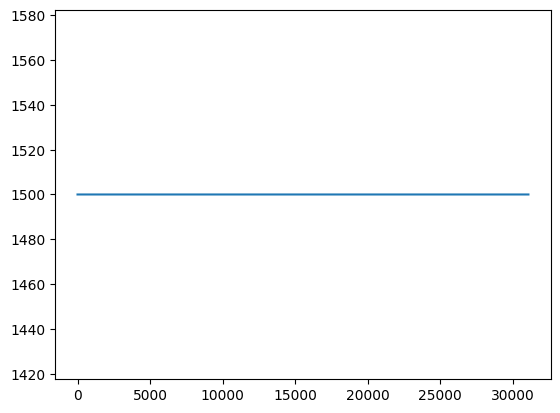

In [19]:
plt.plot(dset[3])
plt.show()

### Spot Diameter

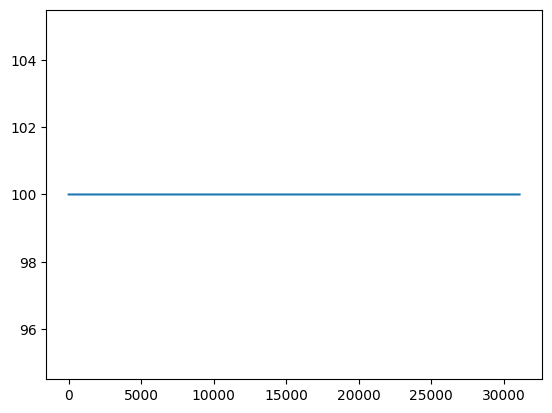

In [20]:
plt.plot(dset[4])
plt.show()

### LaserPowerCurrent

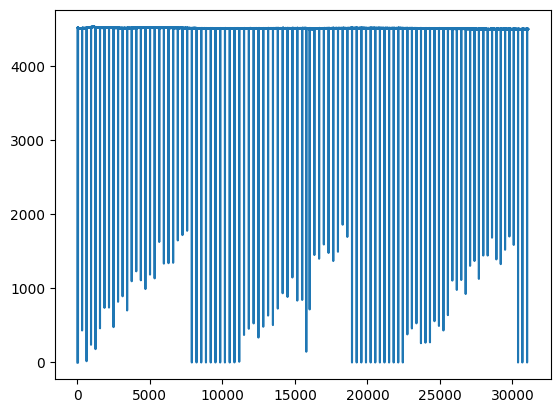

In [21]:
plt.plot(dset[5])
plt.show()

### SignalPdInGaAs

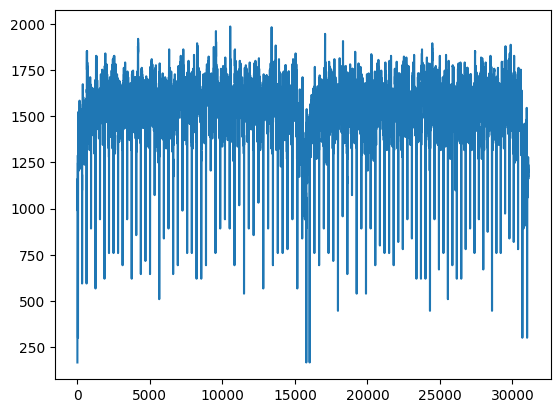

In [22]:
plt.plot(dset[6])
plt.show()

### IDbulkLayer

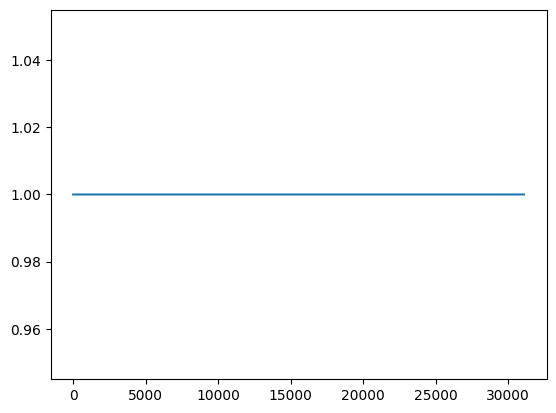

In [23]:
plt.plot(dset[7])
plt.show()

### IDoocLayer

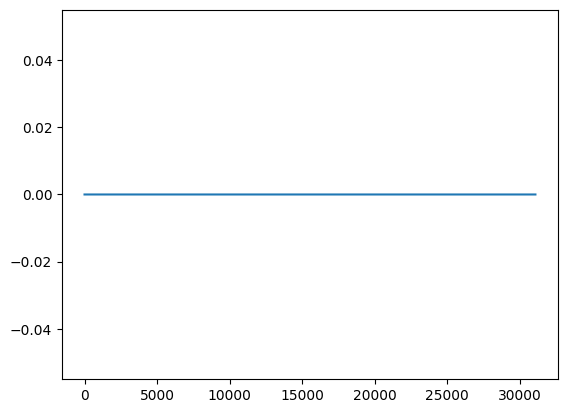

In [24]:
plt.plot(dset[8])
plt.show()

### c_1_cost

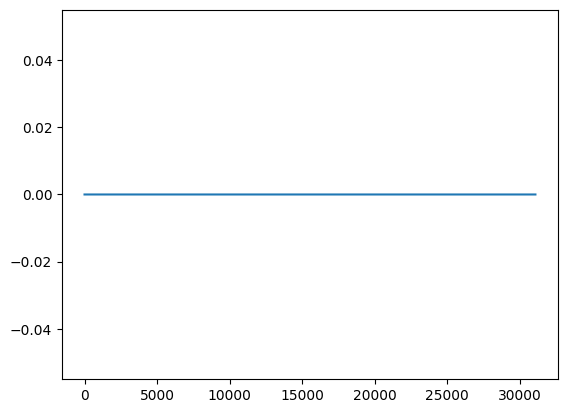

In [25]:
plt.plot(dset[9])
plt.show()

### c_2_cost

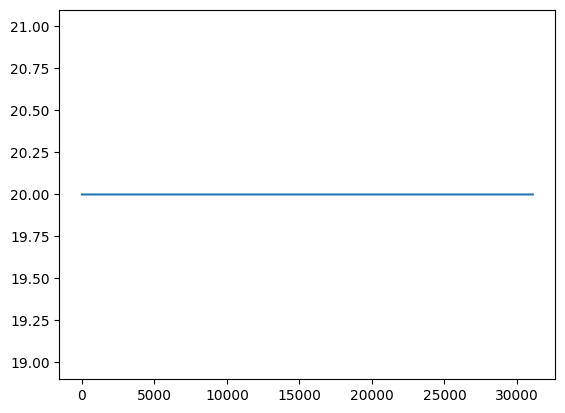

In [26]:
plt.plot(dset[10])
plt.show()

In [5]:
folder_path = './DATASET' # Replace with your folder path
# This creates a list of extensions (including the dot)
file_paths = [f for f in Path(folder_path).iterdir() if f.is_file() and f.suffix == '.hdf5']

data = []
min_rows = 32000
for file in file_paths:
    file_info = h5py.File(file, 'r')
    file_data = file_info['OpenData']
    x = file_data[0]
    y = file_data[1]
    #print(len(lazer))
    #print(len(signal))
    if len(x) != len(y):
        print(f"There is an issue with {file}")
    if len(x) < min_rows:
        min_rows = len(x)
    data.append([x, y])
print(f"The minimum number of data points in a single file is {min_rows}")


The minimum number of data points in a single file is 9560


In [6]:
xs = [d[0] for d in data]
ys = [d[1] for d in data]

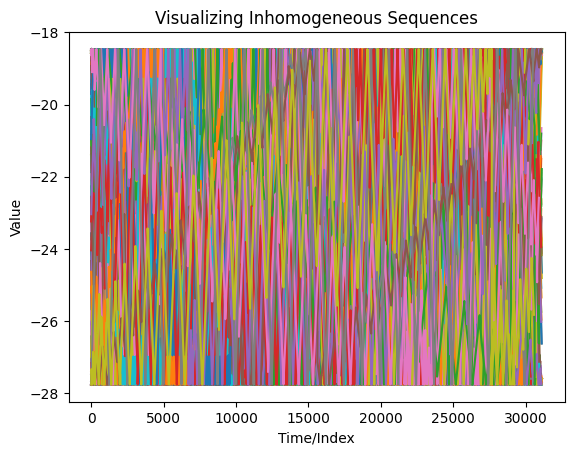

In [7]:
# Instead of plt.plot(xs, ys), which fails on jagged data:
for i in range(len(xs)):
    plt.plot(xs[i])

plt.title("Visualizing Inhomogeneous Sequences")
plt.xlabel("Time/Index")
plt.ylabel("Value")
plt.show()

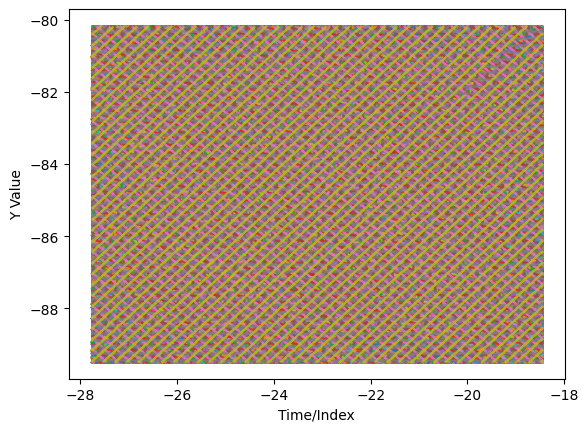

In [9]:
# Instead of plt.plot(xs, ys), which fails on jagged data:
for i in range(len(xs)):
    plt.scatter(xs[i], ys[i], s=0.1)

plt.xlabel("Time/Index")
plt.ylabel("Y Value")
plt.show()